In [210]:
import pandas as pd
import numpy as np
import os
import tqdm
from os import listdir
import librosa
import soundfile as sf
import shutil

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [212]:

directory = "C:/Users/mahii/OneDrive/Desktop/practice/MajorProject/Respiratory sounds/audio_and_txt_files"


In [213]:
content = listdir(directory)

In [214]:
patient_lung_data = []
l = [s for s in content if '.txt' in s]
for i in l:
  for lines in open(directory+'/'+i,'r').readlines():
    patient_lung_data.append([i.split('.')[0].split("_")[0],i.split('.')[0],lines.split()[0],lines.split()[1],lines.split()[2],lines.split()[3]])

In [215]:
def patient(x):
  patient_list = []
  patient_id = x.split('.')[0].split("_")[0]
  recording_index = x.split('.')[0].split("_")[1]
  chest_location = x.split('.')[0].split("_")[2]
  acquisition_mode = x.split('.')[0].split("_")[3]
  recording_equipment = x.split('.')[0].split("_")[4]
  filename = x.split('.')[0]

  patient_list.append(patient_id)
  patient_list.append(recording_index)
  patient_list.append(chest_location)
  patient_list.append(acquisition_mode)
  patient_list.append(recording_equipment)
  patient_list.append(filename)

  return patient_list



In [216]:

df = [patient(s) for s in content if '.txt' in s]
df[0:5]

[['101', '1b1', 'Al', 'sc', 'Meditron', '101_1b1_Al_sc_Meditron'],
 ['101', '1b1', 'Pr', 'sc', 'Meditron', '101_1b1_Pr_sc_Meditron'],
 ['102', '1b1', 'Ar', 'sc', 'Meditron', '102_1b1_Ar_sc_Meditron'],
 ['103', '2b2', 'Ar', 'mc', 'LittC2SE', '103_2b2_Ar_mc_LittC2SE'],
 ['104', '1b1', 'Al', 'sc', 'Litt3200', '104_1b1_Al_sc_Litt3200']]

In [217]:
data = pd.DataFrame(df)

In [218]:
data.columns = ['patient_id','recording_index','chest_location','acquisition_mode','recording_equipment' ,'filename']

In [11]:
data.head()

,patient_id,recording_index,chest_location,acquisition_mode,recording_equipment,filename
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron
1,101,1b1,Pr,sc,Meditron,101_1b1_Pr_sc_Meditron
2,102,1b1,Ar,sc,Meditron,102_1b1_Ar_sc_Meditron
3,103,2b2,Ar,mc,LittC2SE,103_2b2_Ar_mc_LittC2SE
4,104,1b1,Al,sc,Litt3200,104_1b1_Al_sc_Litt3200


In [219]:
print(data['chest_location'].unique())
print(data['recording_equipment'].unique())
print(data['recording_index'].unique() )

['Al' 'Pr' 'Ar' 'Ll' 'Lr' 'Pl' 'Tc']
['Meditron' 'LittC2SE' 'Litt3200' 'AKGC417L']
['1b1' '2b2' '2b1' '2b3' '2b4' '2b5' '3p2' '1p1' '1b2' '1b3' '1b4' '1p2'
 '1p3' '1p4' '2p3' '2p5' '3b3' '3b4' '3p3' '3p4' '2p2' '2p4' '3b2' '8p3'
 '4b4' '5b3' '8b3' '1b5' '1b6' '7b3' '6p1' '7p5' '4b2' '1p5']


In [220]:
data[:10]

,patient_id,recording_index,chest_location,acquisition_mode,recording_equipment,filename
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron
1,101,1b1,Pr,sc,Meditron,101_1b1_Pr_sc_Meditron
2,102,1b1,Ar,sc,Meditron,102_1b1_Ar_sc_Meditron
3,103,2b2,Ar,mc,LittC2SE,103_2b2_Ar_mc_LittC2SE
4,104,1b1,Al,sc,Litt3200,104_1b1_Al_sc_Litt3200
5,104,1b1,Ar,sc,Litt3200,104_1b1_Ar_sc_Litt3200
6,104,1b1,Ll,sc,Litt3200,104_1b1_Ll_sc_Litt3200
7,104,1b1,Lr,sc,Litt3200,104_1b1_Lr_sc_Litt3200
8,104,1b1,Pl,sc,Litt3200,104_1b1_Pl_sc_Litt3200
9,104,1b1,Pr,sc,Litt3200,104_1b1_Pr_sc_Litt3200


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patient_id           920 non-null    object
 1   recording_index      920 non-null    object
 2   chest_location       920 non-null    object
 3   acquisition_mode     920 non-null    object
 4   recording_equipment  920 non-null    object
 5   filename             920 non-null    object
dtypes: object(6)
memory usage: 43.3+ KB


In [222]:
lung_data = pd.DataFrame(patient_lung_data)
lung_data.head()

,0,1,2,3,4,5
0,101,101_1b1_Al_sc_Meditron,0.036,0.579,0,0
1,101,101_1b1_Al_sc_Meditron,0.579,2.45,0,0
2,101,101_1b1_Al_sc_Meditron,2.45,3.893,0,0
3,101,101_1b1_Al_sc_Meditron,3.893,5.793,0,0
4,101,101_1b1_Al_sc_Meditron,5.793,7.521,0,0


In [223]:
lung_data.columns = ['patient_id','filename','start','end','crackles','wheezes']

In [224]:
lung_data.head(10)

,patient_id,filename,start,end,crackles,wheezes
0,101,101_1b1_Al_sc_Meditron,0.036,0.579,0,0
1,101,101_1b1_Al_sc_Meditron,0.579,2.45,0,0
2,101,101_1b1_Al_sc_Meditron,2.45,3.893,0,0
3,101,101_1b1_Al_sc_Meditron,3.893,5.793,0,0
4,101,101_1b1_Al_sc_Meditron,5.793,7.521,0,0
5,101,101_1b1_Al_sc_Meditron,7.521,9.279,0,0
6,101,101_1b1_Al_sc_Meditron,9.279,11.15,0,0
7,101,101_1b1_Al_sc_Meditron,11.15,13.036,0,0
8,101,101_1b1_Al_sc_Meditron,13.036,14.721,0,0
9,101,101_1b1_Al_sc_Meditron,14.721,16.707,0,0


In [225]:
datay = data.merge(lung_data, how = 'outer',on = 'patient_id' and  'filename')
datay

,patient_id_x,recording_index,chest_location,acquisition_mode,recording_equipment,filename,patient_id_y,start,end,crackles,wheezes
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,0.036,0.579,0,0
1,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,0.579,2.45,0,0
2,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,2.45,3.893,0,0
3,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,3.893,5.793,0,0
4,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,5.793,7.521,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6893,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,11.721,13.693,1,0
6894,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,13.693,15.536,0,0
6895,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,15.536,17.493,0,0
6896,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,17.493,19.436,1,0


In [226]:
datay.drop_duplicates()

,patient_id_x,recording_index,chest_location,acquisition_mode,recording_equipment,filename,patient_id_y,start,end,crackles,wheezes
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,0.036,0.579,0,0
1,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,0.579,2.45,0,0
2,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,2.45,3.893,0,0
3,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,3.893,5.793,0,0
4,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,5.793,7.521,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6893,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,11.721,13.693,1,0
6894,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,13.693,15.536,0,0
6895,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,15.536,17.493,0,0
6896,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,17.493,19.436,1,0


In [227]:
patient_demographic = pd.read_csv('C:/Users/mahii/OneDrive/Desktop/practice/MajorProject/Respiratory sounds/patient_diagnosis.csv')
patient_demographic.head(10)

,101,URTI
0,102,Healthy
1,103,Asthma
2,104,COPD
3,105,URTI
4,106,COPD
5,107,COPD
6,108,LRTI
7,109,COPD
8,110,COPD
9,111,Bronchiectasis


In [228]:
patient_demographic.columns = ['patient_id','disease']

In [229]:
patient_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  125 non-null    int64 
 1   disease     125 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [230]:
c1 = pd.DataFrame({'patient_id':[101],
                   'disease':['URTI']})
c1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  1 non-null      int64 
 1   disease     1 non-null      object
dtypes: int64(1), object(1)
memory usage: 148.0+ bytes


In [231]:
patient_demographic = pd.concat([patient_demographic,c1])

In [232]:
patient_demographic['patient_id'].unique()

array([102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 101], dtype=int64)

In [233]:
datay = datay.drop('patient_id_y',axis= 1)

In [234]:
datay.rename(columns = {'patient_id_x':'patient_id'}, inplace = True)

In [235]:
datay.head()

,patient_id,recording_index,chest_location,acquisition_mode,recording_equipment,filename,start,end,crackles,wheezes
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,0.036,0.579,0,0
1,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,0.579,2.45,0,0
2,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,2.45,3.893,0,0
3,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,3.893,5.793,0,0
4,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,5.793,7.521,0,0


In [236]:
daty = datay.convert_dtypes()

In [238]:
datay['patient_id'] = datay['patient_id'].astype('int64')

In [240]:
datay['start'] = datay['start'].astype('float64')
datay['end'] = datay['end'].astype('float64')
datay['crackles'] = datay['crackles'].astype('int64')
datay['wheezes'] = datay['wheezes'].astype('int64')

In [241]:
datay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           6898 non-null   int64  
 1   recording_index      6898 non-null   object 
 2   chest_location       6898 non-null   object 
 3   acquisition_mode     6898 non-null   object 
 4   recording_equipment  6898 non-null   object 
 5   filename             6898 non-null   object 
 6   start                6898 non-null   float64
 7   end                  6898 non-null   float64
 8   crackles             6898 non-null   int64  
 9   wheezes              6898 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 539.0+ KB


In [242]:
def recording_to_clips(root, start, end, sr = 44100):

  maximum_index = len(root)
  start_index = min(int(start*sr), maximum_index)
  end_index = min(int(end*sr), maximum_index)
  return root[start_index:end_index]

In [243]:
os.makedirs('/content/sample_data/processed_clips')

In [244]:
i = 0
n = 0
for index, rows in tqdm.tqdm(datay.iterrows()):
  max_length = 6
  start_time = rows['start']
  end_time = rows['end']
  filename = rows['filename']

  if end_time - start_time > max_length:
    end = start_time + max_length

  audio_file_path = directory + '/' + filename + '.wav'

  if index > 0:
    if datay.iloc[index-1]['filename'] == filename:
      i += 1
    else:
      i = 0

  filename = filename + '_' + str(i) + '.wav'
  save_path = '/content/sample_data/processed_clips/'+filename
  n += 1

  audio, sample_rate = librosa.load(audio_file_path)
  sample = recording_to_clips(audio,start_time,end_time,sample_rate)

  required_length = max( 6*sample_rate, len(sample))
  padded_data = librosa.util.pad_center(sample,size = required_length)

  sf.write(file = save_path,data = padded_data, samplerate = sample_rate)

  # print('total files processed:', n)

0it [00:00, ?it/s]

6898it [01:45, 65.55it/s]


In [245]:
path = '/content/sample_data/processed_clips/'


In [246]:
lll = [[s.split("_")[0],s] for s in os.listdir(path = path)]
patient_data = pd.DataFrame(lll,columns = ['patient_id','filename'])
patient_data

,patient_id,filename
0,101,101_1b1_Al_sc_Meditron_0.wav
1,101,101_1b1_Al_sc_Meditron_1.wav
2,101,101_1b1_Al_sc_Meditron_10.wav
3,101,101_1b1_Al_sc_Meditron_11.wav
4,101,101_1b1_Al_sc_Meditron_2.wav
...,...,...
6893,226,226_1b1_Pl_sc_LittC2SE_5.wav
6894,226,226_1b1_Pl_sc_LittC2SE_6.wav
6895,226,226_1b1_Pl_sc_LittC2SE_7.wav
6896,226,226_1b1_Pl_sc_LittC2SE_8.wav


In [247]:
patient_data['patient_id'] = patient_data['patient_id'].astype('int64')

In [248]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  6898 non-null   int64 
 1   filename    6898 non-null   object
dtypes: int64(1), object(1)
memory usage: 107.9+ KB


In [249]:
final_data = patient_data.merge(patient_demographic, how = 'outer', on = 'patient_id')
final_data

,patient_id,filename,disease
0,101,101_1b1_Al_sc_Meditron_0.wav,URTI
1,101,101_1b1_Al_sc_Meditron_1.wav,URTI
2,101,101_1b1_Al_sc_Meditron_10.wav,URTI
3,101,101_1b1_Al_sc_Meditron_11.wav,URTI
4,101,101_1b1_Al_sc_Meditron_2.wav,URTI
...,...,...,...
6893,226,226_1b1_Pl_sc_LittC2SE_5.wav,Pneumonia
6894,226,226_1b1_Pl_sc_LittC2SE_6.wav,Pneumonia
6895,226,226_1b1_Pl_sc_LittC2SE_7.wav,Pneumonia
6896,226,226_1b1_Pl_sc_LittC2SE_8.wav,Pneumonia


In [250]:
final_data[['disease']].value_counts()

disease       
COPD              5746
Healthy            322
Pneumonia          285
URTI               243
Bronchiolitis      160
Bronchiectasis     104
LRTI                32
Asthma               6
Name: count, dtype: int64

In [251]:
def get_features_from_audio(path):
    soundArr,sample_rate= librosa.load(path)
    mfcc=librosa.feature.mfcc(y=soundArr,sr=sample_rate)
    cstft=librosa.feature.chroma_stft(y=soundArr,sr=sample_rate)
    mSpec=librosa.feature.melspectrogram(y=soundArr,sr=sample_rate)
    tone = librosa.feature.tonnetz(y=soundArr,sr=sample_rate)
    specCen = librosa.feature.spectral_centroid(y=soundArr,sr=sample_rate)

    return mfcc,cstft,mSpec,tone, specCen

In [252]:
from PIL import Image

In [253]:
os.mkdir('/content/sample_data/mfcc_processed_images')

In [254]:
def store_img(dir_path,feature,filename):
    s_img = librosa.power_to_db(feature)
    img = Image.fromarray(s_img)
    img = img.convert('L')
    img.save(os.path.join(dir_path,filename+'.png'))

In [255]:
root = '/content/sample_data/processed_clips/'
mfcc_dir = '/content/sample_data/mfcc_processed_images/'


for idx,row in tqdm.tqdm(final_data.iterrows()):
    path=root + row['filename']
    a,b,c,d,e=get_features_from_audio(path)
    store_img(mfcc_dir,a,row['filename'].split('.')[0])

0it [00:00, ?it/s]c:\Users\mahii\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
6898it [29:55,  3.84it/s]


In [256]:
dir = '/content/sample_data/mfcc_processed_images/'

In [257]:
mfcc_content = os.listdir(dir)

In [258]:
print(mfcc_content)

['101_1b1_Al_sc_Meditron_0.png', '101_1b1_Al_sc_Meditron_1.png', '101_1b1_Al_sc_Meditron_10.png', '101_1b1_Al_sc_Meditron_11.png', '101_1b1_Al_sc_Meditron_2.png', '101_1b1_Al_sc_Meditron_3.png', '101_1b1_Al_sc_Meditron_4.png', '101_1b1_Al_sc_Meditron_5.png', '101_1b1_Al_sc_Meditron_6.png', '101_1b1_Al_sc_Meditron_7.png', '101_1b1_Al_sc_Meditron_8.png', '101_1b1_Al_sc_Meditron_9.png', '101_1b1_Pr_sc_Meditron_0.png', '101_1b1_Pr_sc_Meditron_1.png', '101_1b1_Pr_sc_Meditron_10.png', '101_1b1_Pr_sc_Meditron_2.png', '101_1b1_Pr_sc_Meditron_3.png', '101_1b1_Pr_sc_Meditron_4.png', '101_1b1_Pr_sc_Meditron_5.png', '101_1b1_Pr_sc_Meditron_6.png', '101_1b1_Pr_sc_Meditron_7.png', '101_1b1_Pr_sc_Meditron_8.png', '101_1b1_Pr_sc_Meditron_9.png', '102_1b1_Ar_sc_Meditron_0.png', '102_1b1_Ar_sc_Meditron_1.png', '102_1b1_Ar_sc_Meditron_10.png', '102_1b1_Ar_sc_Meditron_11.png', '102_1b1_Ar_sc_Meditron_12.png', '102_1b1_Ar_sc_Meditron_2.png', '102_1b1_Ar_sc_Meditron_3.png', '102_1b1_Ar_sc_Meditron_4.png', '

In [259]:
mfcc_list = [(s.split('.')[0].split("_")[0], s) for s in mfcc_content]

In [260]:
mfcc_list = pd.DataFrame(mfcc_list)

In [261]:
mfcc_list.columns = ['patient_id','filename']

In [262]:
mfcc_list

,patient_id,filename
0,101,101_1b1_Al_sc_Meditron_0.png
1,101,101_1b1_Al_sc_Meditron_1.png
2,101,101_1b1_Al_sc_Meditron_10.png
3,101,101_1b1_Al_sc_Meditron_11.png
4,101,101_1b1_Al_sc_Meditron_2.png
...,...,...
6893,226,226_1b1_Pl_sc_LittC2SE_5.png
6894,226,226_1b1_Pl_sc_LittC2SE_6.png
6895,226,226_1b1_Pl_sc_LittC2SE_7.png
6896,226,226_1b1_Pl_sc_LittC2SE_8.png


In [263]:
mfcc_list = mfcc_list.convert_dtypes()

In [264]:
mfcc_list['patient_id'] = mfcc_list['patient_id'].astype('Int64')


In [265]:
mfcc_list = mfcc_list.merge(patient_demographic,how = 'outer', on = 'patient_id')

In [266]:
mfcc_list

,patient_id,filename,disease
0,101,101_1b1_Al_sc_Meditron_0.png,URTI
1,101,101_1b1_Al_sc_Meditron_1.png,URTI
2,101,101_1b1_Al_sc_Meditron_10.png,URTI
3,101,101_1b1_Al_sc_Meditron_11.png,URTI
4,101,101_1b1_Al_sc_Meditron_2.png,URTI
...,...,...,...
6893,226,226_1b1_Pl_sc_LittC2SE_5.png,Pneumonia
6894,226,226_1b1_Pl_sc_LittC2SE_6.png,Pneumonia
6895,226,226_1b1_Pl_sc_LittC2SE_7.png,Pneumonia
6896,226,226_1b1_Pl_sc_LittC2SE_8.png,Pneumonia


In [267]:
import matplotlib.pyplot as plt

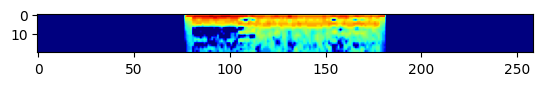

In [269]:
s_img = Image.open('/content/sample_data/mfcc_processed_images/226_1b1_Pl_sc_LittC2SE_1.png')
plt.imshow(s_img, cmap='jet')

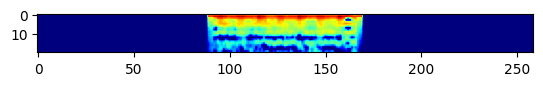

In [272]:
s_img = Image.open('/content/sample_data/mfcc_processed_images/101_1b1_Al_sc_Meditron_10.png')
plt.imshow(s_img, cmap='jet')

In [273]:
import cv2

In [274]:
def assign_img(path,file):
    
    image_data = []
    image_labels = []

    for idx,row in tqdm.tqdm(file.iterrows()):
        img = path + row['filename']
        image = cv2.imread(img)

        image_fromarray = Image.fromarray(image,'RGB')
        image_data.append(image)
        image_labels.append(row['disease'])

    return image_data,image_labels

In [275]:
mfcc_data,mfcc_labels = assign_img('/content/sample_data/mfcc_processed_images/',mfcc_list)

6898it [00:43, 156.84it/s]


In [276]:
print(mfcc_labels)

['URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Asthma', 'Asthma', 'Asthma', 'Asthma', 'Asthma', 'Asthma', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'URTI', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COP

In [277]:
le = LabelEncoder()
le.fit(mfcc_labels)
mfcc_labels = le.transform(mfcc_labels)

In [278]:
X_train,X_test,Y_train,Y_test = train_test_split(mfcc_data,mfcc_labels,test_size = 0.3, random_state=143)

In [279]:
def feature_shape(feature):
  ushape = [np.shape(sub_list) for sub_list in feature]
  return set(ushape)


def feature_padding(feature):
  min_shape = min(sub_array.shape for sub_list in feature for sub_array in sub_list)
  print(min_shape, type(min_shape))
  # Padding each subarray to the minimum shape with zeros
  feature_padded = [[sub_array[:min_shape[0]] for sub_array in sub_list] for sub_list in feature]
  return feature_padded

In [280]:
mfcc_shape = feature_shape(X_train)

In [281]:
mfcc_feature = feature_padding(X_train)

(259, 3) <class 'tuple'>


In [282]:
mfcc_feature = np.array(mfcc_feature)

In [283]:
mfcc_test = feature_padding(X_test)

(259, 3) <class 'tuple'>


In [284]:
mfcc_test = np.array(mfcc_test)

In [285]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1,
),
    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=5,
    verbose=1,
    mode="min",
    min_lr=0.00001,
)
]

In [286]:
mfcc_input=keras.layers.Input(shape=(20,259,3),name="mfccInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(mfcc_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mfcc_output=keras.layers.Flatten()(x)

mfcc_model=keras.Model(mfcc_input, mfcc_output, name="mfccModel")

In [287]:
mfcc_model.summary()

Model: "mfccModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mfccInput (InputLayer)          │ (None, 20, 259, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 20, 87, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20, 87, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 20, 87, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 10, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 11, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 5, 11, 96)      │        24,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 5, 11, 96)      │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 5, 11, 96)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 5, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 5, 128)      │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 2, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 2, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1280)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,160 (375.62 KB)

 Trainable params: 95,520 (373.12 KB)

 Non-trainable params: 640 (2.50 KB)

In [288]:
input_mfcc=keras.layers.Input(shape=(20,259,3),name="mfcc")
mfcc=mfcc_model(input_mfcc)


hidden=keras.layers.Dropout(0.2)(mfcc)
hidden=keras.layers.Dense(50,activation='relu')(mfcc)
hidden=keras.layers.Dropout(0.3)(hidden)
hidden=keras.layers.Dense(25,activation='relu')(hidden)
hidden=keras.layers.Dropout(0.3)(hidden)
output=keras.layers.Dense(8,activation='softmax')(hidden)

net=keras.Model(input_mfcc, output, name="Net")

In [289]:
print(type(mfcc))

<class 'keras.src.backend.common.keras_tensor.KerasTensor'>


In [290]:
net.summary()

Model: "Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mfcc (InputLayer)               │ (None, 20, 259, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mfccModel (Functional)          │ (None, 1280)           │        96,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │        64,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,693 (631.61 KB)

 Trainable params: 161,053 (629.11 KB)

 Non-trainable params: 640 (2.50 KB)

In [291]:
import keras
import tensorflow as tf

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)

net.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# tf.keras.backend.set_value(net.optimizer.learning_rate, 0.001)


In [292]:
history=net.fit(mfcc_feature, Y_train,
    validation_data=(mfcc_test,Y_test),
    epochs=100,verbose=1,
    callbacks=my_callbacks
)


Epoch 1/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.6457 - loss: 1.1792 - val_accuracy: 0.8198 - val_loss: 1.1961 - learning_rate: 0.0010
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.8332 - loss: 0.6005 - val_accuracy: 0.8382 - val_loss: 0.4705 - learning_rate: 0.0010
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.8491 - loss: 0.4197 - val_accuracy: 0.8430 - val_loss: 0.5814 - learning_rate: 0.0010
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8523 - loss: 0.4037 - val_accuracy: 0.8382 - val_loss: 0.4634 - learning_rate: 0.0010
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8693 - loss: 0.3482 - val_accuracy: 0.8570 - val_loss: 0.6424 - learning_rate: 0.0010
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8609 - loss: 0.3718 - val_accuracy: 0.8942 - val_loss: 0.3172 - learning_rate: 0.0010
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.8843 - 

In [293]:

# Save the model
net.save('lung_disease.keras')

In [294]:
y_pred = net.predict(mfcc_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [295]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

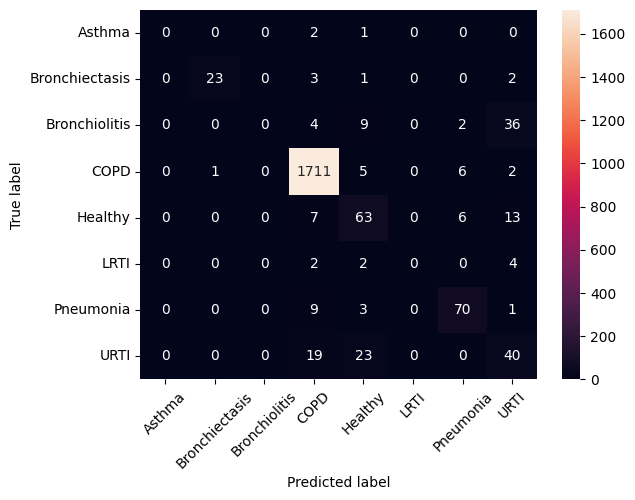

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)

# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Display the plot
plt.show()

In [304]:
from sklearn.metrics import accuracy_score
def predict(x_test):
    y_pred = net.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = Y_test
    mapping = {
        0: 'Asthma',
        1: 'Bronchiectasis',
        2: 'Bronchiolitis',
        3: 'COPD',
        4: 'Healthy',
        5: 'LRTI',
        6: 'Pneumonia',
        7: 'URTI'
    }

    # Replace numerical labels with original labels
    predictions = [mapping[label] for label in y_pred_classes]
    accuracy = accuracy_score(y_true, y_pred_classes)
    print("Test Accuracy:", accuracy)
    
    return predictions


In [311]:
predict(mfcc_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Test Accuracy: 0.9028985507246376


['COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'Pneumonia',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'Pneumonia',
 'Healthy',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'URTI',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'Pneumonia',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'URTI',
 'COPD',
 'COPD',
 'Pneumonia',
 'Pneumonia',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'Bronchi

In [309]:
mfcc_test[1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [209]:
shutil.rmtree('/content/sample_data/mfcc_processed_images')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/sample_data/mfcc_processed_images'

In [ ]:
shutil.rmtree('/content/sample_data/processed_clips')